 ## Artificial Neural Networks using MNIST digit data. 

In [55]:
# import necessary packages & libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Load MNIST data (digits 0 to 9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [58]:
# Check the shape of the training and testing data
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Checking the number of unique labels in the training and test sets
print(f"Unique labels in training data: {np.unique(y_train)}")
print(f"Unique labels in testing data: {np.unique(y_test)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)
Unique labels in training data: [0 1 2 3 4 5 6 7 8 9]
Unique labels in testing data: [0 1 2 3 4 5 6 7 8 9]


##Here, there are 60,000 images with 28 pixels width and 28 pixels height in the Training set & 10,0000 images with 28 pixels width and 28 pixels height in test set.

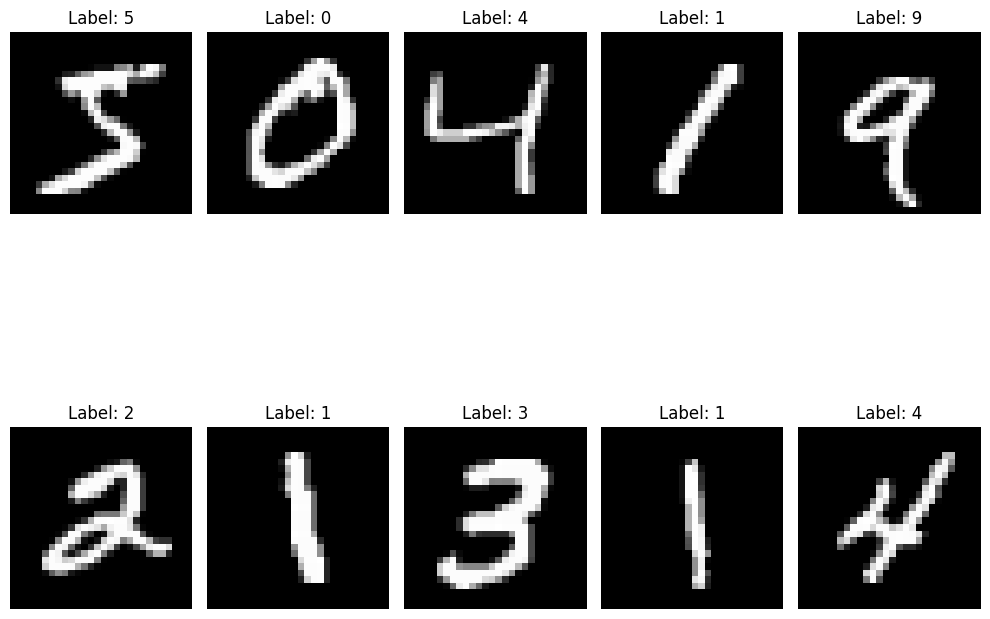

In [59]:
# Display the first 10 images with their labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [60]:
# Inspect pixel values of the first image(which is greyscale of number 5)
print(f"First image pixel values:\n{x_train[0]}")

First image pixel values:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 

In [61]:
# data type of the images
print(f"Data type of images: {x_train.dtype}")

# Check the range of pixel values
print(f"Min pixel value: {x_train.min()}, Max pixel value: {x_train.max()}")

Data type of images: uint8
Min pixel value: 0, Max pixel value: 255


In [62]:
# Including only 0 & 1 digits to build binary classification problem.

In [63]:
# Filter the data to include only digits 0 and 1
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

In [64]:
# Normalize the pixel values (from 0-255 to 0-1)
x_train_filtered = x_train_filtered.astype('float32') / 255.0
x_test_filtered = x_test_filtered.astype('float32') / 255.0

In [65]:
# Reshape the data to be (num_samples, 28*28) for the ANN
x_train_filtered = x_train_filtered.reshape(x_train_filtered.shape[0], 28*28)
x_test_filtered = x_test_filtered.reshape(x_test_filtered.shape[0], 28*28)

# Print the new shapes after filtering and reshaping
print(f"Filtered training data shape: {x_train_filtered.shape}")
print(f"Filtered testing data shape: {x_test_filtered.shape}")

# Check the number of unique labels in the filtered training and test sets
print(f"Unique labels in filtered training data: {np.unique(y_train_filtered)}")
print(f"Unique labels in filtered testing data: {np.unique(y_test_filtered)}")

Filtered training data shape: (12665, 784)
Filtered testing data shape: (2115, 784)
Unique labels in filtered training data: [0 1]
Unique labels in filtered testing data: [0 1]


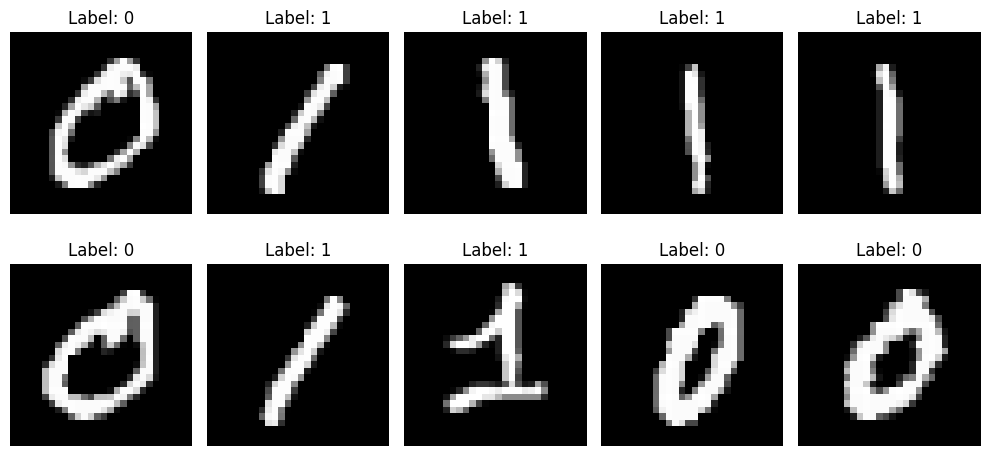

In [66]:
# Display the first few images from the filtered training data
num_samples = 10
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_filtered[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train_filtered[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [68]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(28*28,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron (binary classification)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [70]:
#Define EarlyStopping callback with Keras Callback
early_stopping = EarlyStopping(
    monitor='val_loss',        
    patience=5,                
    restore_best_weights=True  
)

In [71]:
#model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,353 (204.50 KB)

 Trainable params: 52,353 (204.50 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Split the filtered training data into training and validation sets (80% training, 20% validation)
from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_filtered, y_train_filtered, test_size=0.2, random_state=42
)

# Train the model
history = model.fit(
    x_train_split, y_train_split,
    epochs=50,
    batch_size=32,
    validation_data=(x_val_split, y_val_split),
    callbacks=[early_stopping],
    verbose=1
)
stopped_epoch = len(history.history['loss']) - early_stopping.patience
print(f"Training stopped at epoch: {stopped_epoch}")

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9803 - loss: 0.0702 - val_accuracy: 0.9992 - val_loss: 0.0019
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.9980 - val_loss: 0.0061
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9992 - loss: 0.0020 - val_accuracy: 0.9988 - val_loss: 0.0024
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9988 - val_loss: 0.0032
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0010 - val_accuracy: 0.9988 - val_loss: 0.0050
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 4.7015e-04 - val_accuracy: 0.9988 - val_loss: 0.0027
Training stopped at epoch: 1


In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_filtered, y_test_filtered)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.4410e-04
Test Loss: 0.0015261003281921148
Test Accuracy: 0.9995272159576416


In [74]:
# Predict the labels for the test data
y_pred = model.predict(x_test_filtered)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [75]:
# Construct a confusion matrix
conf_matrix = confusion_matrix(y_test_filtered, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 979    1]
 [   0 1135]]


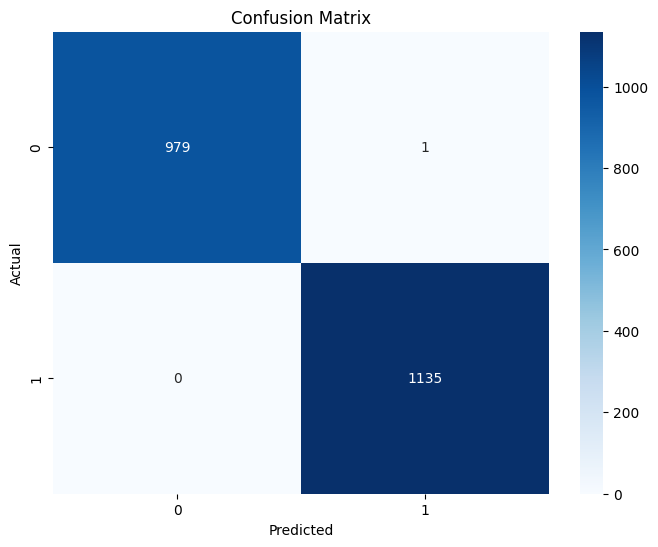

In [76]:
# Display confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the above image:                 
True Negatives (979): The model correctly predicted 979 instances as class '0' (negative) when they were actually class '0'.                            
False Positives (1): The model predicted 1 instance as class '1' (positive) when it was actually class '0'.                         
False Negatives (0): There are no false negatives, meaning the model did not predict any instance as class '0' when it was actually class '1'.           
True Positives (1135): The model correctly predicted 1135 instances as class '1' (positive) when they were actually class '1'.         

In short, the model shows very high accuracy, correctly classifying nearly all instances in both classes. The confusion matrix indicates that the model's predictions for this binary classification task are highly reliable.

In [77]:
# Print a classification report
print("Classification Report:")
print(classification_report(y_test_filtered, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



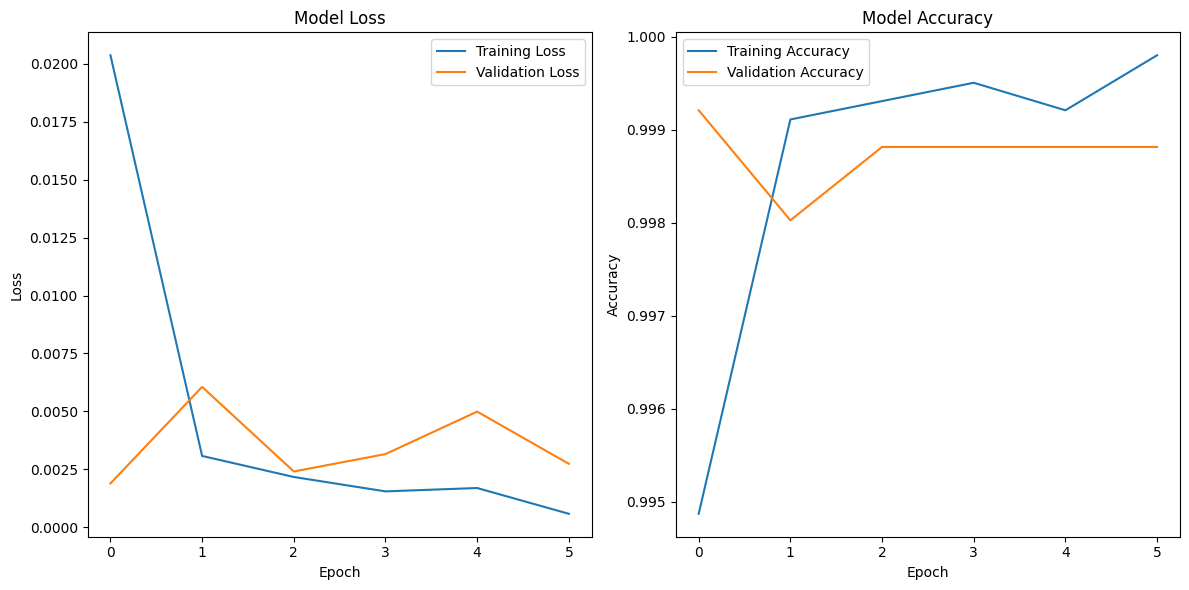

In [78]:
# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The above two plots display the model's performance in terms of loss and accuracy over 6 epochs for both training and validation data:

Left Plot (Model Loss): This shows how the loss decreases over time. The training loss (blue) drops rapidly after the first epoch and continues to decline, indicating that the model is learning effectively. The validation loss (orange) fluctuates slightly after the initial drop but remains stable at a low value, suggesting that the model generalizes well to unseen data.

Right Plot (Model Accuracy): This demonstrates the accuracy trend. The training accuracy (blue) improves consistently over the epochs, reaching close to 1.0, meaning that the model classifies the training data almost perfectly. The validation accuracy (orange) slightly fluctuates but stabilizes around 99.8%, showing that the model is also highly accurate on the validation data.

Overall, both plots indicate a well-performing model, with minimal overfitting and stable validation performance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


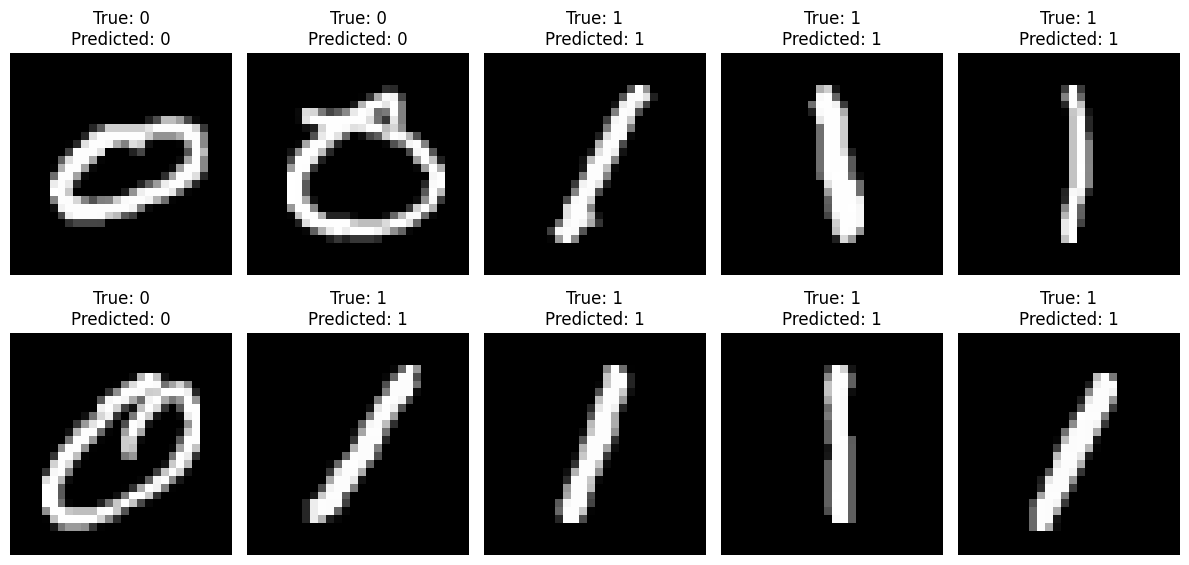

In [79]:
# Number of samples to display
num_examples = 10

sample_indices = np.random.choice(len(x_test_filtered), num_examples, replace=False)
sample_images = x_test_filtered[sample_indices]
sample_labels = y_test_filtered[sample_indices]
sample_predictions = model.predict(sample_images)
sample_predictions_classes = (sample_predictions > 0.5).astype(int).flatten()

# Display the images with predicted and actual labels
plt.figure(figsize=(12, 6))
for i in range(num_examples):
    plt.subplot(2, num_examples // 2, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPredicted: {sample_predictions_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [80]:
# Make predictions on the test data
predictions = model.predict(x_test_filtered)
predicted_labels = (predictions > 0.5).astype("int32")

# Calculate the number of correct predictions
correct = np.sum(predicted_labels.flatten() == y_test_filtered)

print(f"Correctly predicted {correct} out of {len(y_test_filtered)} test samples.")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Correctly predicted 2114 out of 2115 test samples.


In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
tn, fp, fn, tp = confusion_matrix(y_test_filtered, y_pred_classes).ravel()

# Calculate metrics
precision_0 = tp / (tp + fp)
recall_0 = tp / (tp + fn)
f1_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)

precision_1 = tn / (tn + fn)
recall_1 = tn / (tn + fp)
f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

# Print metrics
print(f"Precision for class 0: {precision_0:.2f}")
print(f"Recall for class 0: {recall_0:.2f}")
print(f"F1-score for class 0: {f1_score_0:.2f}")

print(f"Precision for class 1: {precision_1:.2f}")
print(f"Recall for class 1: {recall_1:.2f}")
print(f"F1-score for class 1: {f1_score_1:.2f}")

accuracy = accuracy_score(y_test_filtered, y_pred_classes)
print(f"Overall Accuracy: {accuracy:.2f}")

Precision for class 0: 1.00
Recall for class 0: 1.00
F1-score for class 0: 1.00
Precision for class 1: 1.00
Recall for class 1: 1.00
F1-score for class 1: 1.00
Overall Accuracy: 1.00


####K fold cross validation to check for overfitting

In [82]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the model-building function
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(28*28,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

val_losses = []
val_accuracies = []

for train_index, val_index in kf.split(x_train_filtered):
    x_train_fold, x_val_fold = x_train_filtered[train_index], x_train_filtered[val_index]
    y_train_fold, y_val_fold = y_train_filtered[train_index], y_train_filtered[val_index]

    model = build_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    history = model.fit(x_train_fold, y_train_fold,
                        epochs=50,
                        batch_size=32,
                        validation_data=(x_val_fold, y_val_fold),
                        callbacks=[early_stopping],
                        verbose=0)

    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

avg_val_loss = np.mean(val_losses)
avg_val_accuracy = np.mean(val_accuracies)

print(f"Average Validation Loss: {avg_val_loss:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average Validation Loss: 0.0046
Average Validation Accuracy: 0.9986


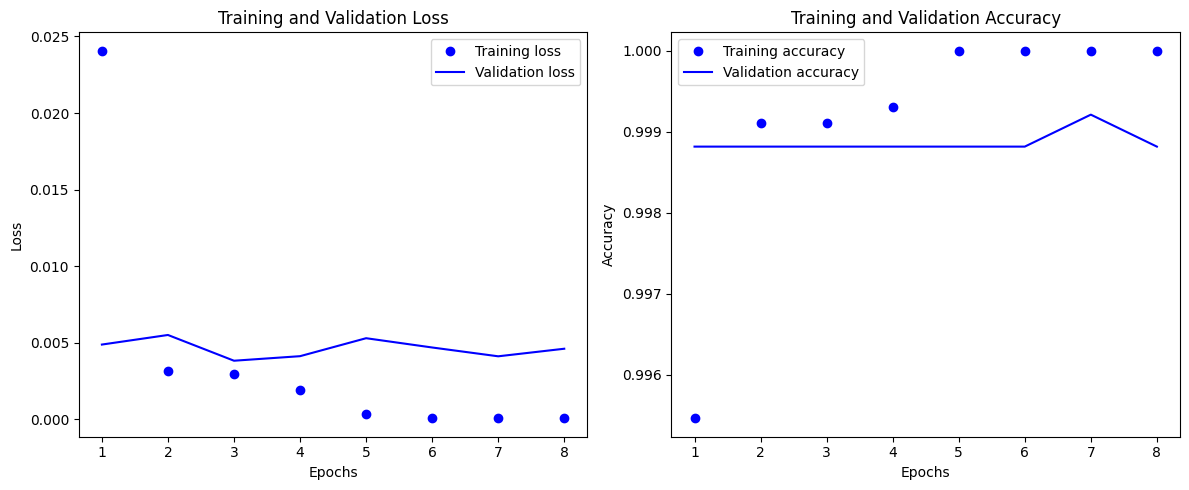

In [84]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

This is done to check for overfitting using K fold Cross Validation where k=5. Here the training loss (dots) decreases gradually, while validation loss (line) fluctuates at a lower value, indicating no significant overfitting. Similarly, the training accuracy consistently improves, nearing 100%, and validation accuracy stabilizes around 99.9%, showing strong generalization performance.

## NN for multi-class classification considering all the classes (10 classes) in the MNIST digit dataset with early stopping criteria.

In [342]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [343]:
# Check the shape of the training and testing data
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Check the number of unique labels in the training and test sets
print(f"Unique labels in training data: {np.unique(y_train)}")
print(f"Unique labels in testing data: {np.unique(y_test)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)
Unique labels in training data: [0 1 2 3 4 5 6 7 8 9]
Unique labels in testing data: [0 1 2 3 4 5 6 7 8 9]


In [345]:
# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [346]:
# Reshape data to fit the model input (28x28 images flattened into 784-dimensional vectors)
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

In [347]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (60000, 784), Labels shape: (60000, 10)
Test data shape: (10000, 784), Labels shape: (10000, 10)


In [344]:
# Original labels before one-hot encoding (show first 5 labels)
print("Original labels (first 5):", y_train[:5])

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, 10)

# Labels after one-hot encoding (show first 5 one-hot encoded labels)
print("One-hot encoded labels (first 5):")
print(y_train_encoded[:5])

Original labels (first 5): [5 0 4 1 9]
One-hot encoded labels (first 5):
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [348]:
# Define the neural network with 3 hidden layers
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (10 classes, using softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_153 (Dense)                    │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

##### The model consists of four layers: an input layer with 784 units, followed by three hidden layers with 128, 64, and 32 units, respectively, all using ReLU activation. The output layer has 10 units with a softmax activation function to handle the 10-class classification. The model uses categorical cross-entropy as the loss function and Adam as the optimizer. The total number of trainable parameters is 111,146.

In [353]:
#Without early stopping
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)  # Use 20% of the training data for validation

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9903 - loss: 0.0275 - val_accuracy: 0.9715 - val_loss: 0.1215
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9753 - val_loss: 0.1068
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9737 - val_loss: 0.1217
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9743 - val_loss: 0.1223
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9949 - loss: 0.0149 - val_accuracy: 0.9747 - val_loss: 0.1234
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9758 - val_loss: 0.1321
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0.9741 - val_loss: 0.1448
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9946 - loss: 0.0166

In [354]:
# With early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,  
                    callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.9757 - val_loss: 0.1649
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 0.9757 - val_loss: 0.1642
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9769 - val_loss: 0.1641
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 0.9732 - val_loss: 0.2000
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9773 - val_loss: 0.1773
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9982 - loss: 0.0064 - val_accuracy: 0.9774 - val_loss: 0.1736
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9744 - val_loss: 0.2040
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9978 - loss: 0.0093 -

In [367]:
# Extract validation loss and accuracy from history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

final_val_loss = val_loss[-1]
final_val_accuracy = val_accuracy[-1]
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

Final Validation Loss: 0.1725
Final Validation Accuracy: 0.9778


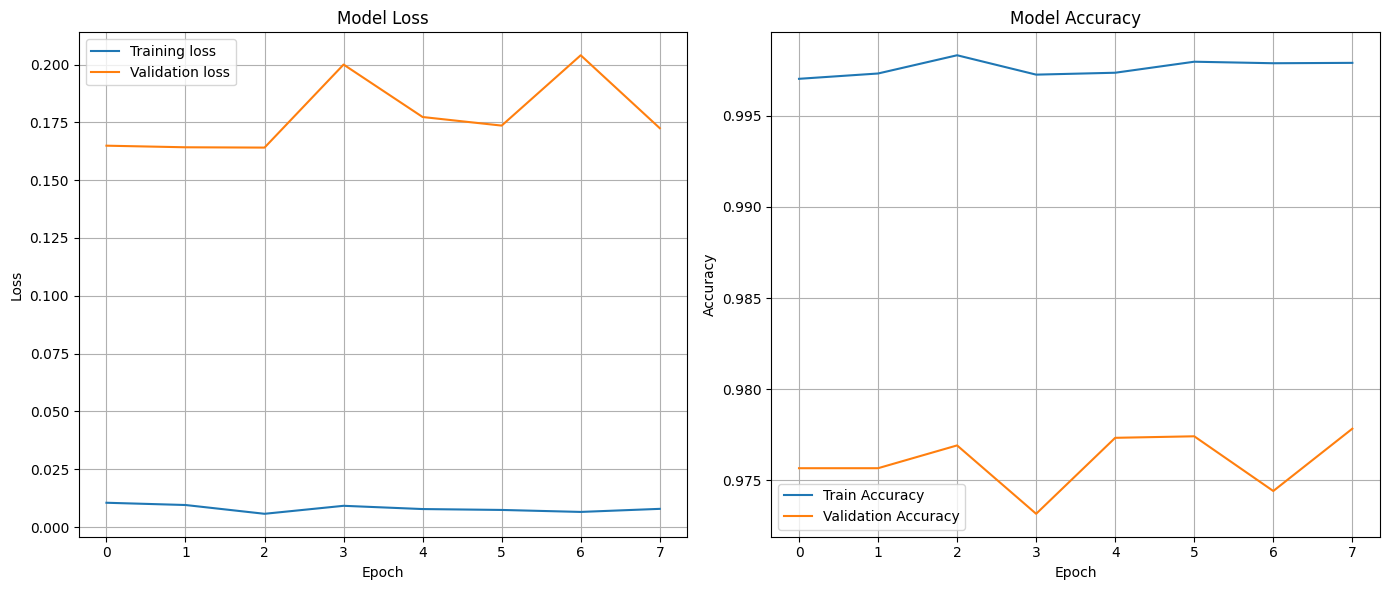

In [357]:
# Plot training & validation loss values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.grid()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid()

plt.tight_layout()
plt.show()

#####These above graphs show performance over 7 epochs. The loss graph indicates stable training loss with some fluctuations in validation loss. The accuracy graph reveals consistently high training accuracy (around 99.7%) and good validation accuracy (between 97.3% and 97.8%) which suggests the model generalizes well to unseen data.. The model demonstrates strong performance, though there's potential to further refine its consistency on validation data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


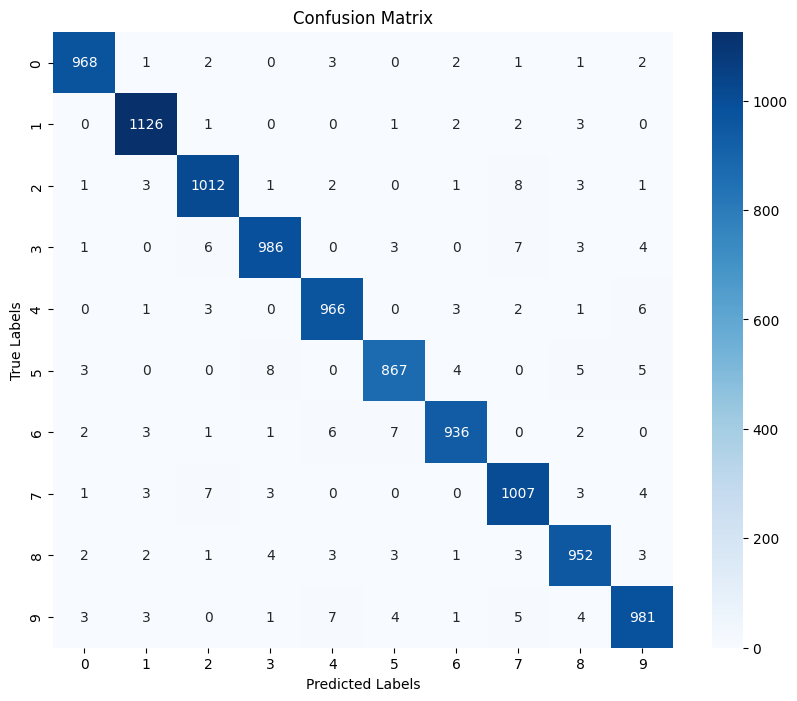

In [358]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The diagonal of the matrix contains the highest values, colored in dark blue, which indicates that the model is performing well overall. These numbers represent correct predictions. For example, the model correctly identified 968 instances of the digit 0, 1126 instances of digit 1, and so on.
Off-diagonal elements represent misclassifications. For instance, the model mistook 8 instances of digit 5 as digit 3. The lighter shades of blue in these cells indicate fewer misclassifications compared to correct predictions.
Overall, this confusion matrix suggests that the classification model is performing quite accurately across all digit classes, with relatively few misclassifications.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


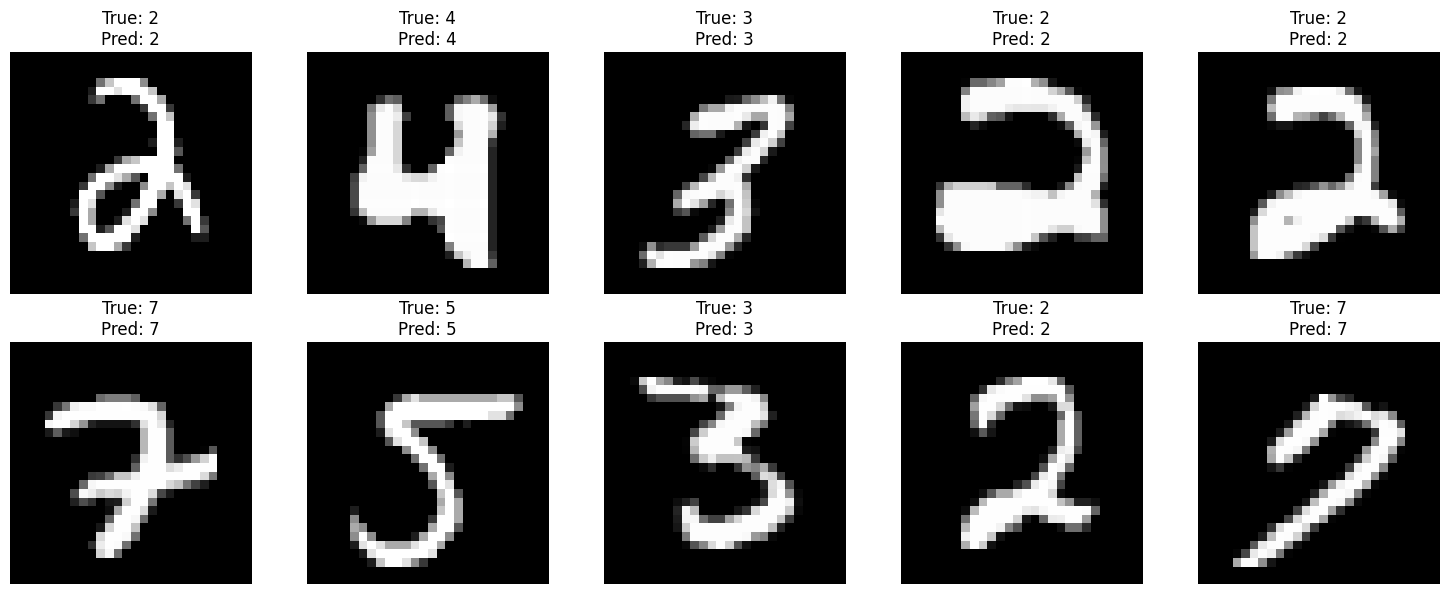

In [359]:
num_samples = 10
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Predict the labels for these samples
y_pred = model.predict(X_test[sample_indices])
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test[sample_indices], axis=1)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(sample_indices):
    plt.subplot(2, num_samples//2, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [360]:
# Predict & calculate labels for the entire test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

correct_predictions = np.sum(y_pred_classes == y_true)
total_test_samples = len(X_test)

print(f"The model correctly predicted {correct_predictions} out of {total_test_samples} test samples.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The model correctly predicted 9801 out of 10000 test samples.


In [364]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

precision = precision_score(y_true, y_pred_classes, average=None)
recall = recall_score(y_true, y_pred_classes, average=None)
f1 = f1_score(y_true, y_pred_classes, average=None)

precision_macro = precision_score(y_true, y_pred_classes, average='macro')
recall_macro = recall_score(y_true, y_pred_classes, average='macro')
f1_macro = f1_score(y_true, y_pred_classes, average='macro')

# Print the results
print(f"Overall Accuracy: {accuracy:.4f}")
print("\nClass-wise Precision:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.4f}")

print("\nClass-wise Recall:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.4f}")

print("\nClass-wise F1 Score:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.4f}")

print("\nAverage Precision: {:.4f}".format(precision_macro))
print("Average Recall: {:.4f}".format(recall_macro))
print("Averaged F1 Score: {:.4f}".format(f1_macro))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Overall Accuracy: 0.9801

Class-wise Precision:
Class 0: 0.9867
Class 1: 0.9860
Class 2: 0.9797
Class 3: 0.9821
Class 4: 0.9787
Class 5: 0.9797
Class 6: 0.9853
Class 7: 0.9729
Class 8: 0.9744
Class 9: 0.9751

Class-wise Recall:
Class 0: 0.9878
Class 1: 0.9921
Class 2: 0.9806
Class 3: 0.9762
Class 4: 0.9837
Class 5: 0.9720
Class 6: 0.9770
Class 7: 0.9796
Class 8: 0.9774
Class 9: 0.9722

Class-wise F1 Score:
Class 0: 0.9873
Class 1: 0.9890
Class 2: 0.9801
Class 3: 0.9791
Class 4: 0.9812
Class 5: 0.9758
Class 6: 0.9811
Class 7: 0.9762
Class 8: 0.9759
Class 9: 0.9737

Average Precision: 0.9801
Average Recall: 0.9799
Averaged F1 Score: 0.9800


The model delivered excellent results on the MNIST test set, achieving a final test accuracy of 98.01% and a test loss of 0.1244. During training, it reached a validation accuracy of 97.78% with a final validation loss of 0.1725.

In terms of class-specific performance, the model showed high precision, recall, and F1 scores across all digits, with average values around 98.01% for precision, 97.99% for recall, and 98.00% for the F1 score.
Class-wise Precision ranged from 97.29% to 98.67%.                 
Class-wise Recall ranged from 97.20% to 99.21%.                      
Class-wise F1 Score ranged from 97.37% to 98.90%.       

However, the model's performance was slightly lower for certain classes, such as Class 7 and Class 5, indicating that these digits were more challenging for the model to classify accurately.

Overall, the model was highly effective, correctly predicted 9,801 out of 10,000 test samples. It demonstrated strong consistency across different digits, showcasing its robustness and reliability for digit classification tasks.
